#House Prices - Advanced Regression Techniques
##Predict sales prices and practice feature engineering, RFs, and gradient boosting

import libraries and data loading from Kaggle "house-prices-advanced-regression-techniques"
and loading data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/gdrive')
# main_path = '/content/gdrive/Othercomputers/ה-מחשב נייד שלי/תואר שני/הסקה סטטיסטית וכריית נתונים/Assignments/HW2/Kaggle - House Prices/house-prices-advanced-regression-techniques'
main_path = '/content/gdrive/MyDrive/Statistical_Data_Mining/Assignment_2/house-prices-advanced-regression-techniques' 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train = pd.read_csv(main_path + '/train.csv')
test = pd.read_csv(main_path + '/test.csv')
submit = pd.read_csv(main_path + "/sample_submission.csv")

# Section 1: Database Overview and Visualization

In this section we will overview the database, understand it structure.

## 1.1 Data discription

We will make new database 'house_df' that is the concatinate of the test and train so wi can remove or add features to all the frames conveniently

In [ ]:
print("train database:")
train

train database:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
print("test database:")
test

test database:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
house_df = pd.concat([train,test],ignore_index = True, sort = False)
tr_idx = house_df['SalePrice'].notnull() ## display data with on
te_idx = [not elem for elem in tr_idx]
te_idx = pd.Series(te_idx)
print("house dataframe shape:{}".format(house_df.shape))

house dataframe shape:(2919, 81)


## 1.2 Missing featurs

There are X fearute that are not existe in all the samples in the dataframe:
* LotFrontage
* Alley
* BsmtQual
* MasVnrArea
* MasVnrArea
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Electrical
* FireplaceQu     
* GarageType                                                           
* GarageCond       
* PoolQC         
* Fence          
* MiscFeature    

Train and Test missing data:

In [ ]:
# house_df missing features
print("house_df missing features")
print("house_df shape: {}".format(train.shape))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(house_df.isna().sum())
missing_data_prec = missing_data/house_df.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

house_df missing features
house_df shape: (1460, 81)
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               4    0.137033
LotFrontage          486   16.649538
LotArea                0    0.000000
Street                 0    0.000000
Alley               2721   93.216855
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              2    0.068517
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            1    0.034258
Exterior2nd           

/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


Train missing data:

In [ ]:
# train missing features
print('train missing features')
print('train shape: {}'.format(train.shape[0]))
pd.set_option('display.max_rows', None)
missing_data = pd.DataFrame(train.isna().sum())
missing_data_prec = missing_data/train.shape[0] * 100
missing_data = pd.concat([missing_data,missing_data_prec], axis=1)
missing_data.columns =['occurence', 'precentage']
print(missing_data)
pd.reset_option('all')

train missing features
train shape: 1460
               occurence  precentage
Id                     0    0.000000
MSSubClass             0    0.000000
MSZoning               0    0.000000
LotFrontage          259   17.739726
LotArea                0    0.000000
Street                 0    0.000000
Alley               1369   93.767123
LotShape               0    0.000000
LandContour            0    0.000000
Utilities              0    0.000000
LotConfig              0    0.000000
LandSlope              0    0.000000
Neighborhood           0    0.000000
Condition1             0    0.000000
Condition2             0    0.000000
BldgType               0    0.000000
HouseStyle             0    0.000000
OverallQual            0    0.000000
OverallCond            0    0.000000
YearBuilt              0    0.000000
YearRemodAdd           0    0.000000
RoofStyle              0    0.000000
RoofMatl               0    0.000000
Exterior1st            0    0.000000
Exterior2nd            0    0.0000

/usr/local/lib/python3.7/dist-packages/pandas/_config/config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


***Most missing features are:***
1.   "Alley" with 93% of missing values
2.   "PoolQC" with 99.52% of missing values
3.   "Fence" with 80.75% of missing values
4.   "MiscFeature" with 96.3% of missing values




## 1.3 Features type distribution

There are 81 diffrent feature, that is a lot of data to handle and process. Additionally, the feature are in diffrent type, not all of them are numerical, they can be splited according to type: 
1. int - 43 features
2. float64 - 25 features
3. object - 12 features

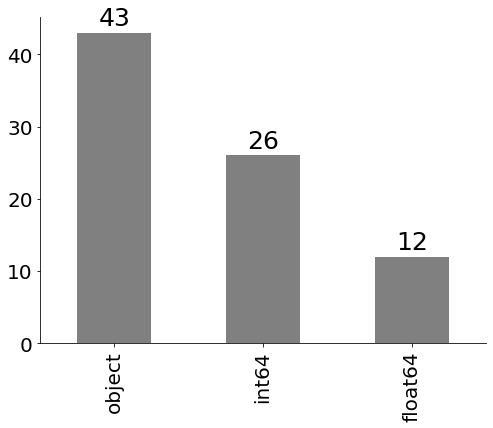

In [ ]:
plt.figure(figsize = (8,6))
ax = house_df.dtypes.value_counts().plot(kind='bar',grid = False,fontsize=20,color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 1, height, ha = 'center', size = 25)
sns.despine()

Statistical description of the numerical features

In [ ]:
house_df.describe().T.style.set_properties(**{'background-color': 'Grey',
                           'color': 'white',
                           'border-color': 'darkblack'})

,count,mean,std,min,25%,50%,75%,max
Id,2919.000000,1460.000000,842.787043,1.000000,730.500000,1460.000000,2189.500000,2919.000000
MSSubClass,2919.000000,57.137718,42.517628,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,2433.000000,69.305795,23.344905,21.000000,59.000000,68.000000,80.000000,313.000000
LotArea,2919.000000,10168.114080,7886.996359,1300.000000,7478.000000,9453.000000,11570.000000,215245.000000
OverallQual,2919.000000,6.089072,1.409947,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,2919.000000,5.564577,1.113131,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,2919.000000,1971.312778,30.291442,1872.000000,1953.500000,1973.000000,2001.000000,2010.000000
YearRemodAdd,2919.000000,1984.264474,20.894344,1950.000000,1965.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,2896.000000,102.201312,179.334253,0.000000,0.000000,0.000000,164.000000,1600.000000
BsmtFinSF1,2918.000000,441.423235,455.610826,0.000000,0.000000,368.500000,733.000000,5644.000000


## 1.4 Feature Histogram

Spliting the data acording to the type from the previuse subsection and ploting hitsograme for every feature to further understanding the numerical meaning behind the features.
It can be conclude from the histogram that:

1. **float64 features:**

  Three float64 features are in fact discrete variables:
  * BsmtHalfBath - Basement half bathrooms
  * BsmtFullBath - Basement full bathrooms
  * GarageCars - Size of garage in car capacity
  
  Some features have a skewed shape to one side.


2. **int features:**

  Five int features values does not represent quantitative sizes
  * MSSubClass - Identifies the type of dwelling involved in the sale.
  * YearBuilt - Original construction date
  * YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)
  * MoSold - Month Sold (MM)
  * YrSold - Year Sold (YYYY)



43
int type features:


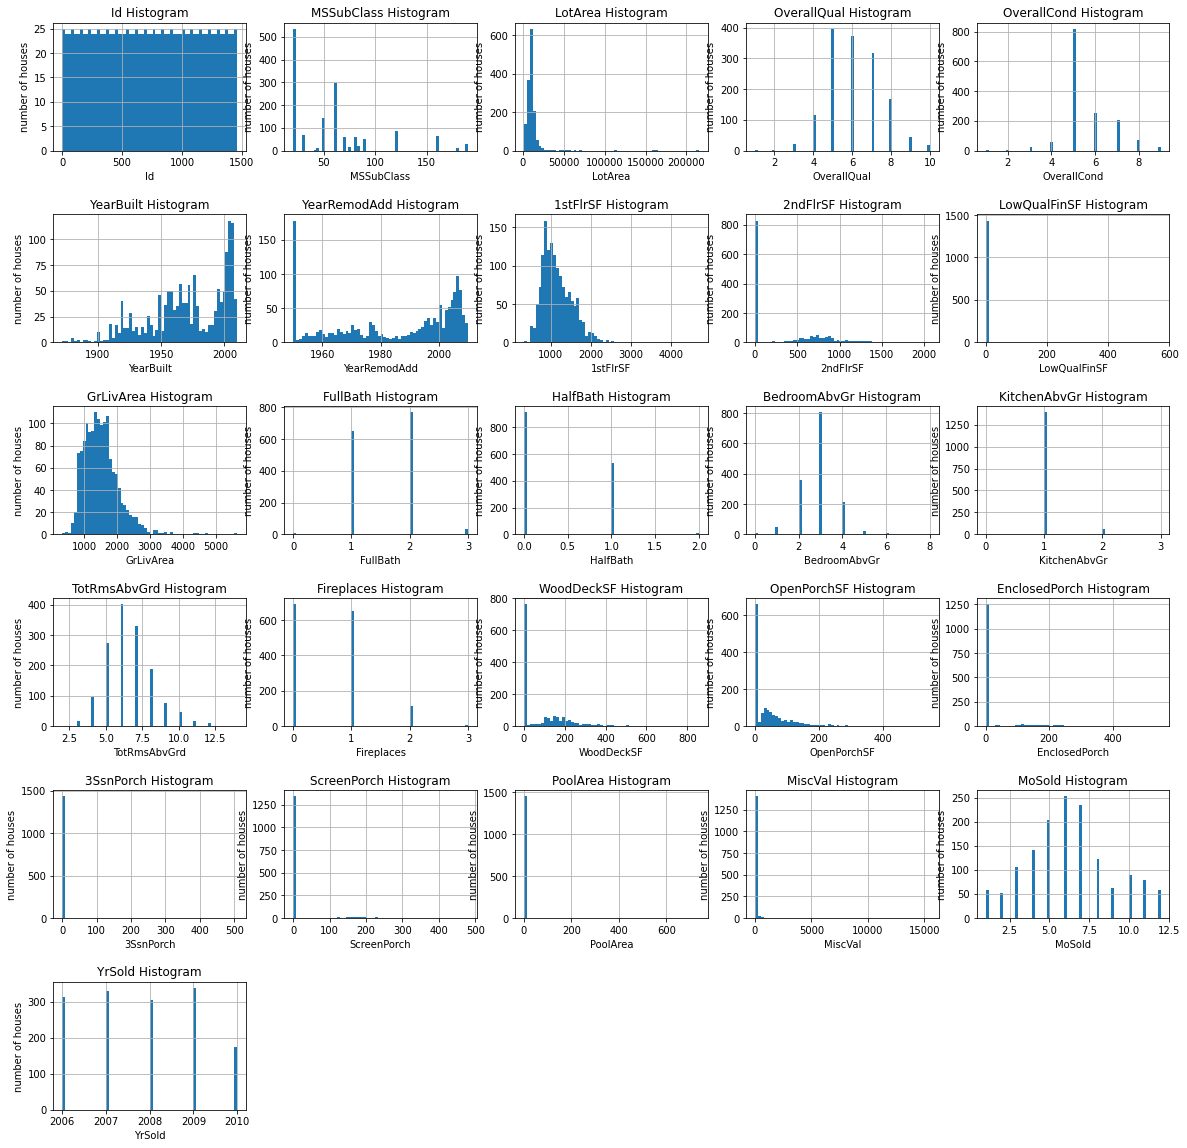

In [ ]:
# Select categorical columns
categorical_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if
                    house_df[cname].nunique() < 200 and 
                    house_df[cname].dtype == "object"]

print(len(categorical_cols))
# Select numerical columns
int_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['int64']]
float_cols = [cname for cname in house_df.loc[:,:'SaleCondition'].columns if 
                house_df[cname].dtype in ['float64']]

print("int type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(int_cols):
    plt.subplot(6,5,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)


float64 type features:


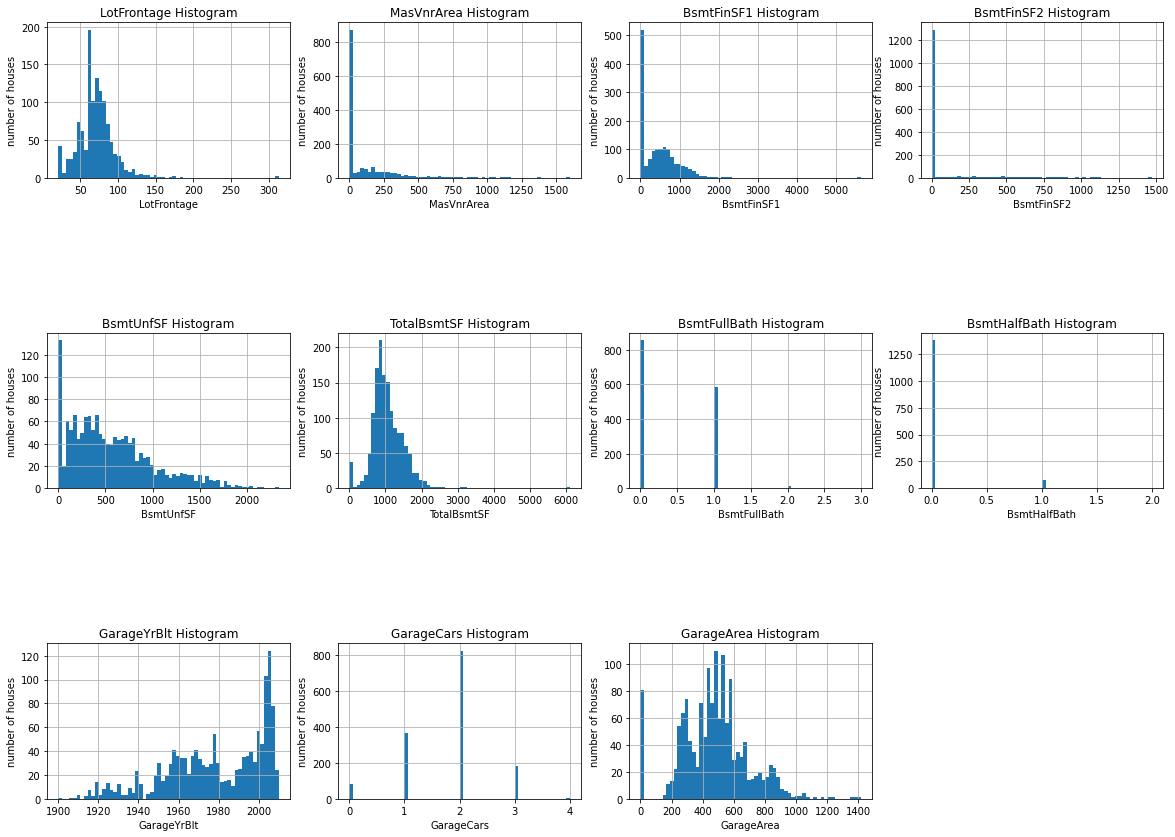

In [ ]:
print("float64 type features:")
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1)
for i, var in enumerate(float_cols):
    plt.subplot(4,4,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

Categorial type features:


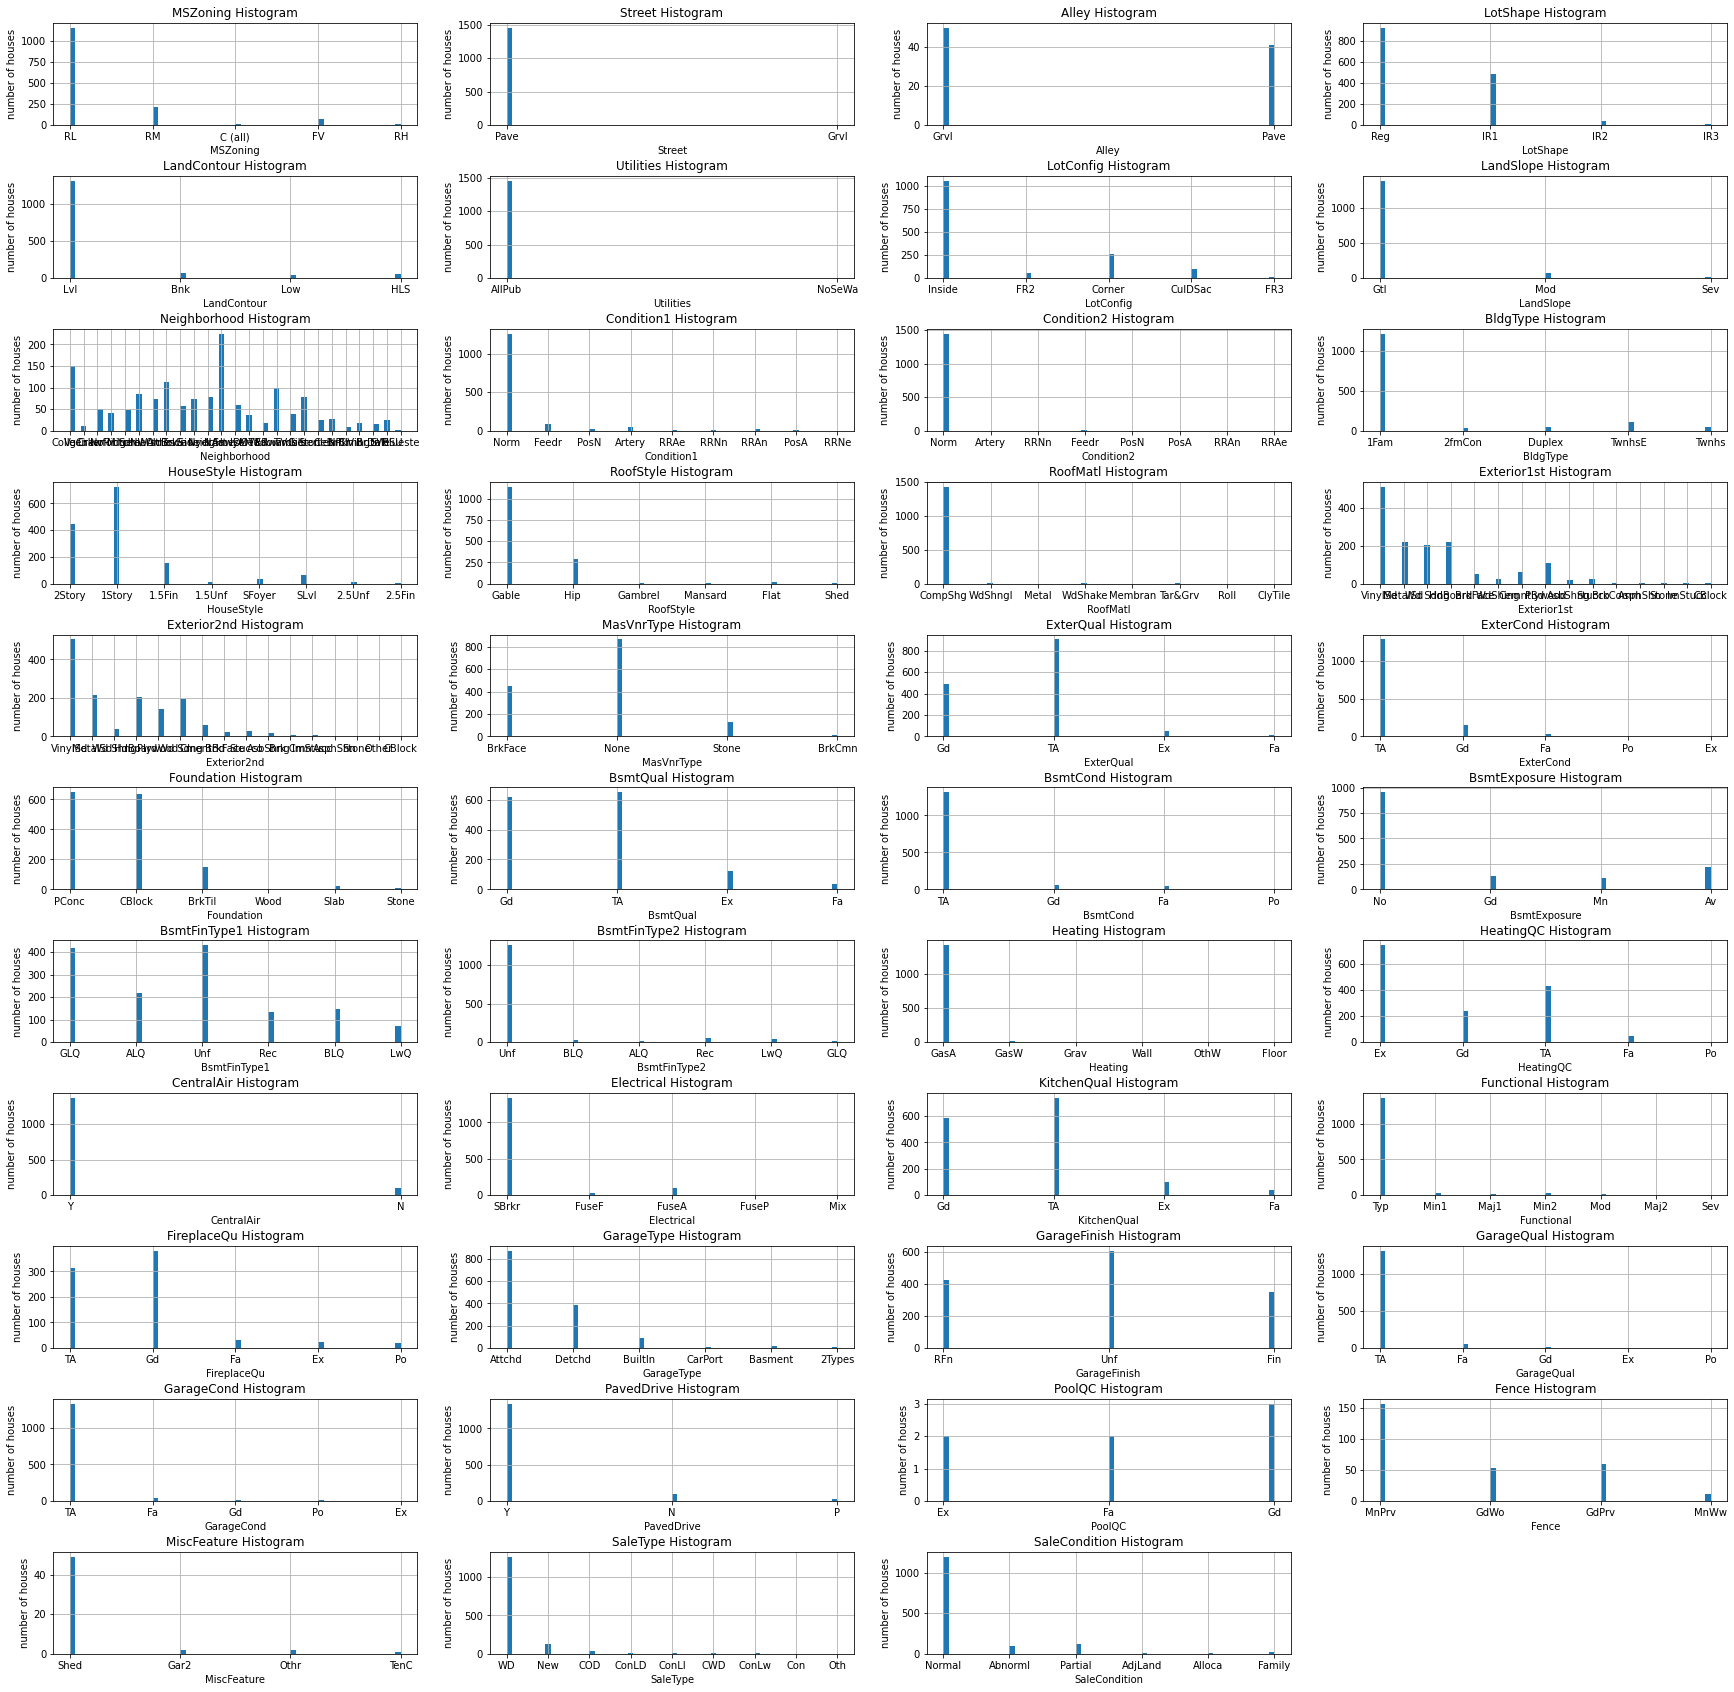

In [ ]:
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = train[var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

factorize categorial values

# Section 2: Feature Engineering



## 2.1 facturize categorical features

In [ ]:
for c in categorical_cols:
  # print(house_df[c])
  house_df[c] = pd.factorize(house_df[c])[0]
  # print(house_df[c])
  # print(np.array(new_c).shape)

Categorial type features:


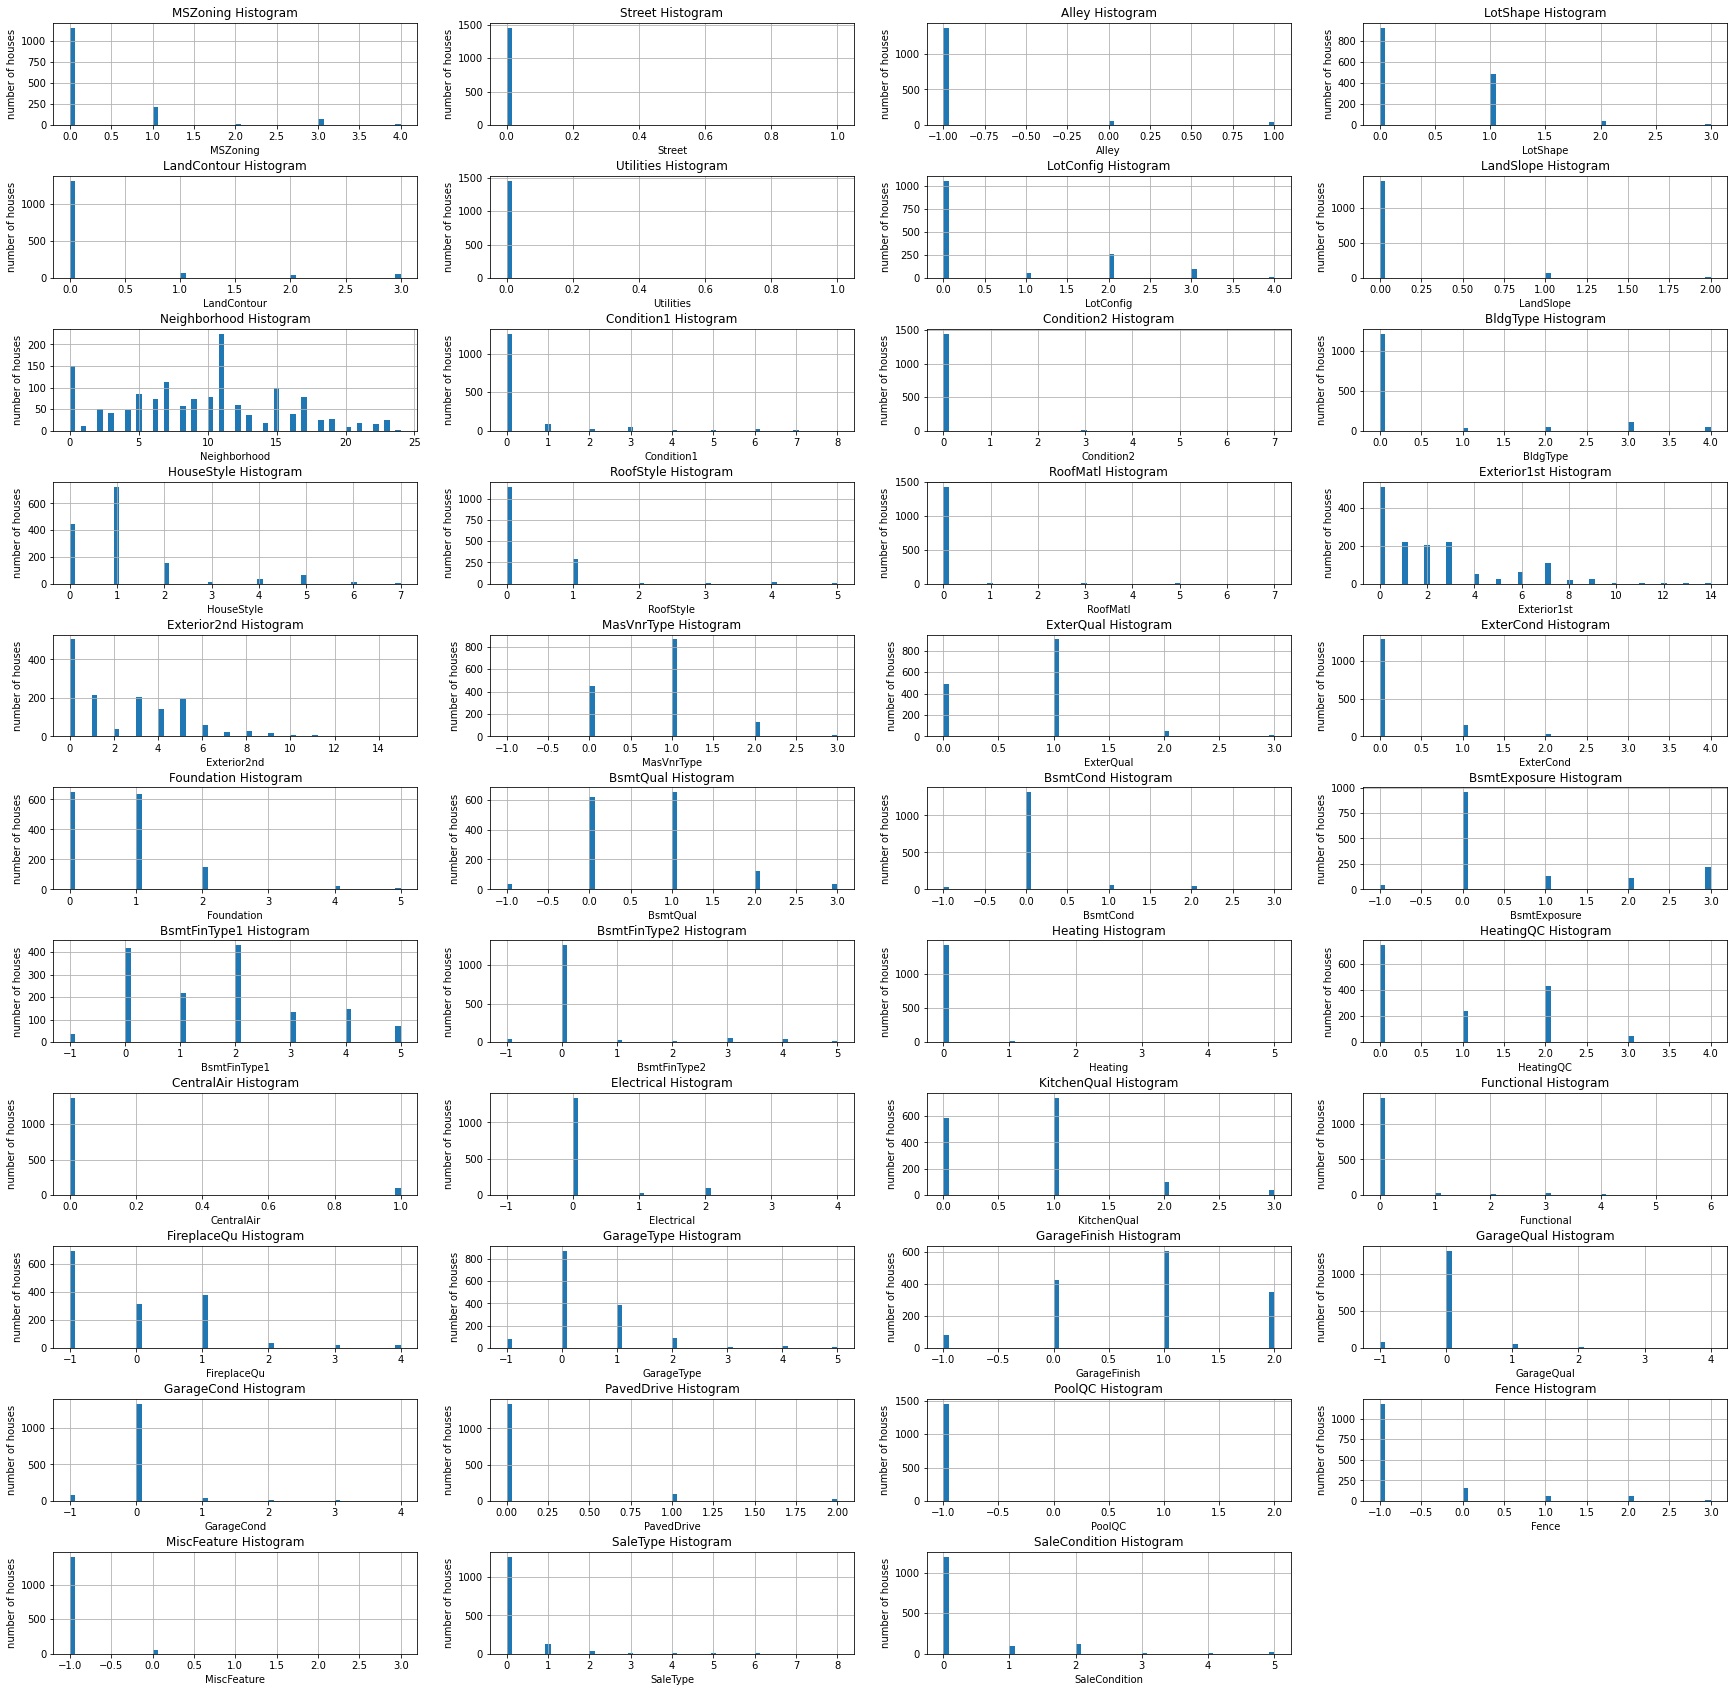

In [ ]:
print("Categorial type features:")
plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)
for i, var in enumerate(categorical_cols):
    plt.subplot(11,4,i+1)
    fig = house_df[tr_idx][var].hist(bins=60)
    fig.set_ylabel('number of houses')
    fig.set_xlabel(var)
    str3= "".join([var,' Histogram'])
    fig.set_title(str3)

## 2.2 Taking care of skewed target

The Sale price is a bit skewed, and for linear models its important that you normalize your data, so im going to log transform it

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log Transform Target SalePrice - unskewed')

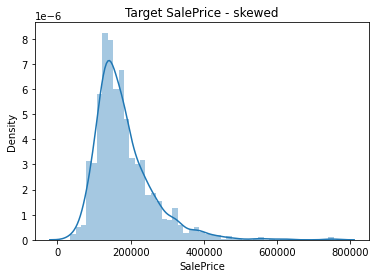

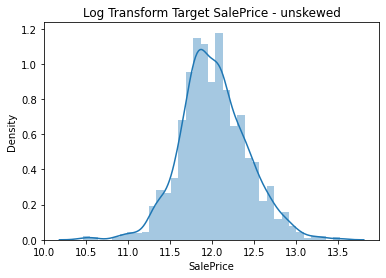

In [ ]:
plt.figure()
sns.distplot(house_df['SalePrice']);
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])
plt.title('Target SalePrice - skewed')
plt.figure()
sns.distplot(house_df['SalePrice'])
plt.title('Log Transform Target SalePrice - unskewed')

## 2.3 Missing Values

https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

In [ ]:
X_train = house_df[tr_idx].drop(['SalePrice'], axis=1)
X_test = house_df[te_idx]
Y_train = house_df[tr_idx].SalePrice
Y_test = house_df[te_idx].SalePrice
overall_X = house_df.drop(['SalePrice'], axis=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(overall_X.shape)

(1460, 80)
(1460,)
(1459, 81)
(1459,)
(2919, 80)


### option 1 - get rid of the columns with the missing values

usually not the best solution. However, it can be useful when most values in a column are missing

In [ ]:
missing_data = [col for col in X_train.columns if (X_train[col].isnull().sum() / X_train.shape[0]) * 100 > 50]
print('missing_data: {}'.format(missing_data))
X_df_drop = overall_X.drop(missing_data, axis=1)
X_train_drop = X_df_drop[tr_idx]
X_test_drop = X_df_drop[te_idx]

print('X_df_drop shape:     {}'.format(X_df_drop.shape))
print('X_train_drop shape:  {}'.format(X_train_drop.shape))
print('X_test_drop shape:   {}'.format(X_test_drop.shape))
print(type(tr_idx))


missing_data: []
X_df_drop shape:     (2919, 80)
X_train_drop shape:  (1460, 80)
X_test_drop shape:   (1459, 80)
<class 'pandas.core.series.Series'>


### option 2 - replacing with statistical value

we should try to apply the missing values algorithms for the concatanate data, and on the train data by itself.

In [ ]:
"""
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
class Imputer(object):
  def __init__(self, X_train, X_test):
    self.X_train = X_train
    self.X_test = X_test
    self.X = pd.concat([X_train, X_test], ignore_index = True, sort = False)

  def zero_imputer(self):
    imputer = SimpleImputer(add_indicator=True, strategy="constant", fill_value=0)
    imputer.fit(self.X)
    new_X = imputer.transform(X)
    new_x_train = imputer.transform(self.X_train)
    nex_X_test = imputer.transform(self.X_test)

  def mean_imputer(self):
    imputer = SimpleImputer(add_indicator=True, strategy="mean")
    new_X = imputer.transform(X)
    new_x_train = imputer.transform(self.X_train)
    nex_X_test = imputer.transform(self.X_test)

  def median_imputer(self):
    imputer = SimpleImputer(add_indicator=True, strategy="median")
    new_X = imputer.transform(X)
    new_x_train = imputer.transform(self.X_train)
    nex_X_test = imputer.transform(self.X_test)

  def most_fre_imputer(self):
    imputer = SimpleImputer(add_indicator=True, strategy="most_frequent")
    new_X = imputer.transform(X)
    new_x_train = imputer.transform(self.X_train)
    nex_X_test = imputer.transform(self.X_test)

  def KNN_imputer(self, K):
    imputer = KNNImputer(n_neighbors=K, weights="uniform")
    new_X = imputer.transform(X)
    new_x_train = imputer.transform(self.X_train)
    nex_X_test = imputer.transform(self.X_test)
"""

'\nfrom sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer\nclass Imputer(object):\n  def __init__(self, X_train, X_test):\n    self.X_train = X_train\n    self.X_test = X_test\n    self.X = pd.concat([X_train, X_test], ignore_index = True, sort = False)\n\n  def zero_imputer(self):\n    imputer = SimpleImputer(add_indicator=True, strategy="constant", fill_value=0)\n    imputer.fit(self.X)\n    new_X = imputer.transform(X)\n    new_x_train = imputer.transform(self.X_train)\n    nex_X_test = imputer.transform(self.X_test)\n\n  def mean_imputer(self):\n    imputer = SimpleImputer(add_indicator=True, strategy="mean")\n    new_X = imputer.transform(X)\n    new_x_train = imputer.transform(self.X_train)\n    nex_X_test = imputer.transform(self.X_test)\n\n  def median_imputer(self):\n    imputer = SimpleImputer(add_indicator=True, strategy="median")\n    new_X = imputer.transform(X)\n    new_x_train = imputer.transform(self.X_train)\n    nex_X_test = imputer.transform(self.X_te

In [ ]:
from sklearn.impute import SimpleImputer

def Imputer(strategy_method, dataset, col ):
  fill_NaN = SimpleImputer(add_indicator=False, strategy=strategy_method)
  imputed_DF = pd.DataFrame(fill_NaN.fit_transform(dataset[col]))
  imputed_DF.columns = dataset[col].columns

  dataset[col] = imputed_DF
  return dataset

In [ ]:
# filling  missing values in most_frequent items
X_train_imp = Imputer("most_frequent",X_df_drop, categorical_cols )
X_train_imp = Imputer("median",X_df_drop, int_cols)
X_train_imp = Imputer("mean",X_df_drop, float_cols)
X_train_imp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,0,65.0,8450.0,0,-1,0,0,0,0,0,0,0,0,0,0,7.0,5.0,2003.0,2003.0,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706.0,0,0.0,150.0,856.0,0,0,0,0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,0,8.0,0,0.0,-1,0,2003.000000,0,2.0,548.0,0,0,0,0.0,61.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,2.0,2008.0,0,0
1,2.0,20.0,0,80.0,9600.0,0,-1,0,0,0,1,0,1,1,0,0,1,6.0,8.0,1976.0,1976.0,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978.0,0,0.0,284.0,1262.0,0,0,0,0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,1,6.0,0,1.0,0,0,1976.000000,0,2.0,460.0,0,0,0,298.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,5.0,2007.0,0,0
2,3.0,60.0,0,68.0,11250.0,0,-1,1,0,0,0,0,0,0,0,0,0,7.0,5.0,2001.0,2002.0,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486.0,0,0.0,434.0,920.0,0,0,0,0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,0,6.0,0,1.0,0,0,2001.000000,0,2.0,608.0,0,0,0,0.0,42.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,9.0,2008.0,0,0
3,4.0,70.0,0,60.0,9550.0,0,-1,1,0,0,2,0,2,0,0,0,0,7.0,5.0,1915.0,1970.0,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216.0,0,0.0,540.0,756.0,0,1,0,0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,0,7.0,0,1.0,1,1,1998.000000,1,3.0,642.0,0,0,0,0.0,35.0,272.0,0.0,0.0,0.0,-1,-1,-1,0.0,2.0,2006.0,0,1
4,5.0,60.0,0,84.0,14260.0,0,-1,1,0,0,1,0,3,0,0,0,0,8.0,5.0,2000.0,2000.0,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655.0,0,0.0,490.0,1145.0,0,0,0,0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,0,9.0,0,1.0,0,0,2000.000000,0,3.0,836.0,0,0,0,192.0,84.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,12.0,2008.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.0,160.0,1,21.0,1936.0,0,-1,0,0,0,0,0,14,0,0,4,0,4.0,7.0,1970.0,1970.0,0,0,6,6,1,0.0,1,0,1,1,0,0,2,0.0,0,0.0,546.0,546.0,0,1,0,0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,1,5.0,0,0.0,-1,-1,1978.113406,-1,0.0,0.0,-1,-1,0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,6.0,2006.0,0,0
2915,2916.0,160.0,1,21.0,1894.0,0,-1,0,0,0,0,0,14,0,0,3,0,4.0,5.0,1970.0,1970.0,0,0,6,6,1,0.0,1,0,1,1,0,0,3,252.0,0,0.0,294.0,546.0,0,2,0,0,546.0,546.0,0.0,1092.0,0.0,0.0,1.0,1.0,3.0,1.0,1,6.0,0,0.0,-1,3,1970.000000,1,1.0,286.0,0,0,0,0.0,24.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,4.0,2006.0,0,1
2916,2917.0,20.0,0,160.0,20000.0,0,-1,0,0,0,0,0,4,0,0,0,1,5.0,7.0,1960.0,1996.0,0,0,0,0,1,0.0,1,0,1,1,0,0,1,1224.0,0,0.0,0.0,1224.0,0,0,0,0,1224.0,0.0,0.0,1224.0,1.0,0.0,1.0,0.0,4.0,1.0,1,7.0,0,1.0,0,1,1960.000000,1,2.0,576.0,0,0,0,474.0,0.0,0.0,0.0,0.0,0.0,-1,-1,-1,0.0,9.0,2006.0,0,1
2917,2918.0,85.0,0,62.0,10441.0,0,-1,0,0,0,0,0,4,0,0,0,4,5.0,5.0,1992.0,1992.0,0,0,3,2,1,0.0,1,0,0,0,0,3,0,337.0,0,0.0,575.0,912.0,0,2,0,0,970.0,0.0,0.0,970.0,0.0,1.0,1.0,0.0,3.0,1.0,1,6.0,0,0.0,-1,-1,1978.113406,-1,0.0,0.0,-1,-1,0,80.0,32.0,0.0,0.0,0.0,0.0,-1,0,0,700.0,7.0,2006.0,0,0


##2.4 Normalize features

https://www.width.ai/pandas/normalize-column-pandas-dataframe

In [ ]:
from scipy import stats
X_train_imp_norm =  pd.DataFrame(stats.zscore(X_train_imp))
X_train_imp_norm.columns = X_df_drop.columns
X_train_imp_norm

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.731458,0.067331,-0.439614,-0.202068,-0.217879,-0.064249,-0.25356,-0.701900,-0.304727,0.010687,-0.575536,-0.21626,-1.664155,-0.320122,-0.092617,-0.423389,-0.881078,0.646183,-0.507284,1.046258,0.896833,-0.429258,-0.112918,-0.881773,-0.946908,-1.229807,0.525202,-1.235608,-0.341878,-0.870225,-0.854704,-0.192224,-0.577897,-1.061898,0.580907,-0.300325,-0.29313,-0.934863,-0.444328,-0.107252,-0.885619,-0.26829,-0.292677,-0.773861,1.207379,-0.101197,0.413547,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,-1.038215,0.986849,-0.239476,-0.924311,-0.837969,-0.491549,1.000929,-1.011360,0.306528,0.348900,-0.035285,0.000856,-0.305475,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.053507,-0.426388,-0.175967,-0.089592,-1.552184,0.157646,-0.29516,-0.390438
1,-1.730271,-0.873616,-0.439614,0.501870,-0.072044,-0.064249,-0.25356,-0.701900,-0.304727,0.010687,0.417953,-0.21626,-1.490195,0.483348,-0.092617,-0.423389,-0.108282,-0.063185,2.188279,0.154764,-0.395604,-0.429258,-0.112918,-0.480480,-0.564820,0.337110,-0.572250,0.468095,-0.341878,0.326283,-0.854704,-0.192224,0.297950,-0.410978,1.178112,-0.300325,-0.29313,-0.629896,0.477111,-0.107252,-0.885619,-0.26829,-0.292677,0.261075,-0.785025,-0.101197,-0.471891,-0.819679,3.822419,0.781366,-0.756321,0.169927,-0.207698,0.397384,-0.287758,-0.239476,0.623632,0.066628,-0.491549,-0.085000,-1.011360,0.306528,-0.059792,-0.035285,0.000856,-0.305475,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.053507,-0.426388,-0.175967,-0.089592,-0.446925,-0.602962,-0.29516,-0.390438
2,-1.729084,0.067331,-0.439614,-0.061280,0.137197,-0.064249,-0.25356,1.052249,-0.304727,0.010687,-0.575536,-0.21626,-1.664155,-0.320122,-0.092617,-0.423389,-0.881078,0.646183,-0.507284,0.980221,0.848965,-0.429258,-0.112918,-0.881773,-0.946908,-1.229807,0.334828,-1.235608,-0.341878,-0.870225,-0.854704,-0.192224,1.173798,-1.061898,0.097873,-0.300325,-0.29313,-0.288516,-0.299076,-0.107252,-0.885619,-0.26829,-0.292677,-0.610718,1.235375,-0.101197,0.563755,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,-1.038215,-0.287758,-0.239476,0.623632,0.066628,-0.491549,0.920490,-1.011360,0.306528,0.627553,-0.035285,0.000856,-0.305475,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.053507,-0.426388,-0.175967,-0.089592,1.026753,0.157646,-0.29516,-0.390438
3,-1.727897,0.302568,-0.439614,-0.436714,-0.078385,-0.064249,-0.25356,1.052249,-0.304727,0.010687,1.411441,-0.21626,-1.316235,-0.320122,-0.092617,-0.423389,-0.881078,0.646183,-0.507284,-1.859351,-0.682812,-0.429258,-0.112918,-0.079186,-0.182732,0.337110,-0.572250,0.468095,-0.341878,1.522791,0.404065,1.941239,-0.577897,-0.410978,-0.494941,-0.300325,-0.29313,-0.047275,-0.671283,-0.107252,0.158453,-0.26829,-0.292677,-0.506205,0.978742,-0.101197,0.427382,1.087023,-0.249895,-1.027363,-0.756321,0.169927,-0.207698,-1.038215,0.349546,-0.239476,0.623632,0.971226,0.613868,0.799831,0.165268,1.619961,0.785457,-0.035285,0.000856,-0.305475,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.053507,-0.426388,-0.175967,-0.089592,-1.552184,-1.363569,-0.29516,0.703314
4,-1.726711,0.067331,-0.439614,0.689587,0.518903,-0.064249,-0.

In [ ]:
"""
from sklearn.cluster import KMeans
kmeans = KMeans(3,init='k-means++')
kmeans.fit(df_preprocessed.drop('species',axis=1))
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(df_preprocessed.drop('species',axis=1))
    pred_i = kmeans.labels_
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,10),wcss)
plt.ylim([0,1800])
plt.title('The Elbow Method',{'fontsize':20})
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares');

new_X_train
"""

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(3,init='k-means++')\nkmeans.fit(df_preprocessed.drop('species',axis=1))\nwcss=[]\nfor i in range(1,10):\n    kmeans = KMeans(i)\n    kmeans.fit(df_preprocessed.drop('species',axis=1))\n    pred_i = kmeans.labels_\n    wcss.append(kmeans.inertia_)\n\nplt.figure(figsize=(10,6))\nplt.plot(range(1,10),wcss)\nplt.ylim([0,1800])\nplt.title('The Elbow Method',{'fontsize':20})\nplt.xlabel('Number of clusters')\nplt.ylabel('Within-cluster Sum of Squares');\n\nnew_X_train\n"

In [ ]:
"""
def optimize_k(data, target):
    errors = []
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors=k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns=df.columns)
        
        X = df_imputed.drop(target, axis=1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
        
    return errors
k_errors = optimize_k(data=df, target='MEDV')
"""

"\ndef optimize_k(data, target):\n    errors = []\n    for k in range(1, 20, 2):\n        imputer = KNNImputer(n_neighbors=k)\n        imputed = imputer.fit_transform(data)\n        df_imputed = pd.DataFrame(imputed, columns=df.columns)\n        \n        X = df_imputed.drop(target, axis=1)\n        y = df_imputed[target]\n        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n        model = RandomForestRegressor()\n        model.fit(X_train, y_train)\n        preds = model.predict(X_test)\n        error = rmse(y_test, preds)\n        errors.append({'K': k, 'RMSE': error})\n        \n    return errors\nk_errors = optimize_k(data=df, target='MEDV')\n"

## 2.5 Corrulations

Relationship between SalePrice and other numerical columns

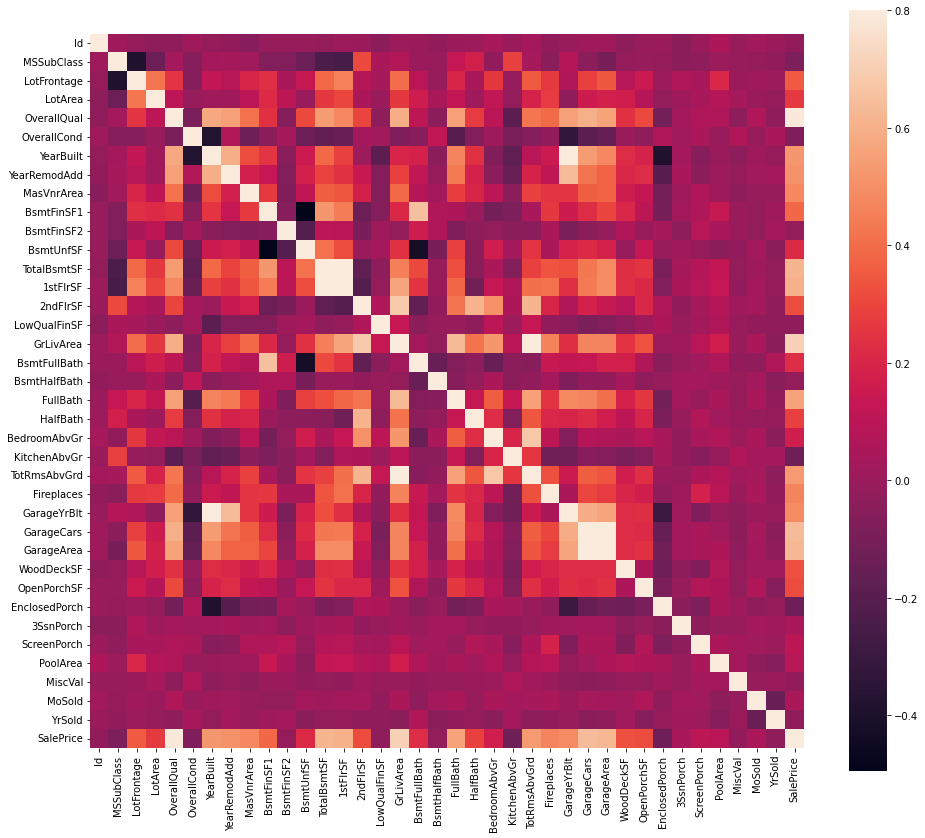

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corrmat, vmax=.8, square=True);

# Section 3: Implement prediction models

## 3.1 Model implemention

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
"""
class Regression_model(object):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def Linear_reg(self):
        self.model = LinearRegression(normalize=True)
        self.model.fit(self.X, self.Y)
        
    def Ridge_reg(self, alpha, X, Y):
        self.model = Ridge(alpha)
        self.model.fit(X, Y)

    def KernelRidge_reg(self, alpha):
        self.model = KernelRidge(alpha)
        self.model.fit(self.X, self.Y)

    def RidgeKfold_reg(self, alphas):
        # should enter a list of alphas - algorithem uses the most beneficial
        # alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1] 
        self.model = RidgeCV(alphas)
        self.model.fit(self.X, self.Y)

    def Poly_reg(self):
        self.model = PolynomialFeatures(interaction_only=True)
        self.model.fit(self.X, self.Y)

    def score_dataset(self, X_test, y_test):
        preds = self.model.predict(X_test)
        return mean_absolute_error(y_test, preds), accuracy_score(y_test,preds), self.model.score(X_test, y_test)
"""
def Regression_model(method,train_data, test_data,alpha):
  if method == "Linear_reg":
    print('Linear_reg')
    model = LinearRegression()
  elif method == "Ridge_reg":
    print('Ridge_reg')
    model = Ridge(alpha)
  elif method == "KernelRidge_reg":
    print('KernelRidge_reg')
    model = KernelRidge(alpha)
  else:
    print('none')
  
  model.fit(train_data,test_data)
  return model

## 3.2 Data Split

Splitting the original train data into train and validation 

consider use k-fold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
print(X_train_imp_norm.shape)
print(Y_train.shape)
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_train_imp[tr_idx], Y_train, test_size = 0.3, random_state = 0)
print("Xtrain : " + str(Xtrain.shape))
print("Xtest : " + str(Xtest.shape))
print("ytrain : " + str(ytrain.shape))
print("ytest : " + str(ytest.shape))

(2919, 80)
(1460,)
Xtrain : (1022, 80)
Xtest : (438, 80)
ytrain : (1022,)
ytest : (438,)


https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

## 3.2 Evaluate models

In [ ]:
def rmse_cv(model, df, target):
    rmse = np.sqrt(-cross_val_score(model, df, target, scoring = "neg_mean_squared_error"))
    return(rmse)

def r2_cv(model, df, target):
    r2 = cross_val_score(model, df, target, scoring = 'r2')
    return(r2)

def evaluate_model(method, Xtrain, ytrain, alpha):
  model = Regression_model(method, Xtrain, ytrain,alpha)
  print("RMSE on Training set : ", rmse_cv(model, Xtrain, ytrain).mean())
  print("R2 on Training set :   ", r2_cv(model, Xtrain, ytrain).mean())
  print("RMSE on Valid set :    ", rmse_cv(model, Xvalid, yvalid).mean())
  print("R2 on Valid set :      ", r2_cv(model, Xvalid, yvalid).mean())
  print()
  return model

In [ ]:
Linear_reg_model = evaluate_model("Linear_reg", Xtrain, ytrain, alpha='NaN')
Ridge_reg_model = evaluate_model("Ridge_reg", Xtrain, ytrain, alpha=10)
KernelRidge_reg_model = evaluate_model("KernelRidge_reg", Xtrain, ytrain, alpha=1)

Linear_reg
RMSE on Training set :  0.15170056615965674
R2 on Training set :    0.854972194900804
RMSE on Valid set :     0.22086227599919503
R2 on Valid set :       0.5996942092951014

Ridge_reg
RMSE on Training set :  0.14794565284119274
R2 on Training set :    0.861616925377775
RMSE on Valid set :     0.19884585636603383
R2 on Valid set :       0.6887702724762748

KernelRidge_reg
RMSE on Training set :  0.14976882120411555
R2 on Training set :    0.8585090361452226
RMSE on Valid set :     0.20181115290212545
R2 on Valid set :       0.6684379252181722

